In [24]:
from keras.datasets import mnist

In [25]:
import tensorflow as tf 
import numpy as np 
from sklearn.model_selection import train_test_split

In [26]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [27]:
print(x_train.shape)

(60000, 28, 28)


In [28]:
print(y_train.shape)

(60000,)


In [29]:
print(x_test.shape)

(10000, 28, 28)


In [30]:
print(y_test.shape)

(10000,)


In [31]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [32]:
print(y_train[0])

5


In [33]:
from matplotlib import pyplot as plt

In [34]:
plt.gray()

<Figure size 432x288 with 0 Axes>

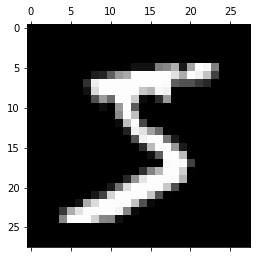

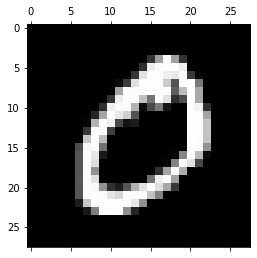

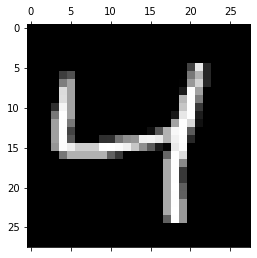

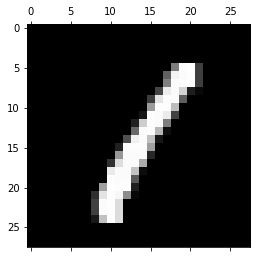

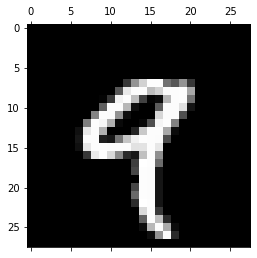

In [35]:
for i in range(0,5):
    plt.matshow(x_train[i])

from matplotlib import pyplot as plt

plt.imshow(train_data[0],cmap='BuGn')
plt.show()

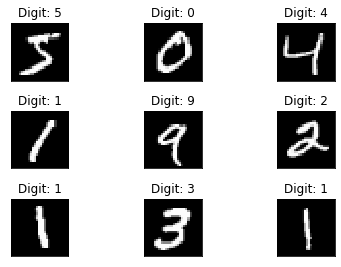

In [36]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [37]:
from keras.utils import np_utils

In [38]:
x_train = np.expand_dims(x_train, axis=-1) # <--- add batch axis
x_train = x_train.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
x_test = np.expand_dims(x_test, axis=-1) # <--- add batch axis
x_test = x_test.astype('float32') / 255
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [39]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D

In [40]:
model=Sequential()

In [41]:
model = tf.keras.models.Sequential([  
    tf.keras.layers.Conv2D(28, (3,3), activation='relu', input_shape=(28, 28, 1)),  
    tf.keras.layers.MaxPooling2D((2, 2)),  
    tf.keras.layers.Conv2D(56, (3,3), activation='relu'),  
    tf.keras.layers.Flatten(),   
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(10, activation='softmax'),  
])  

In [42]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [43]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 50s 26ms/step - loss: 0.2640 - accuracy: 0.9188
Epoch 2/3
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0428 - accuracy: 0.9862
Epoch 3/3
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0247 - accuracy: 0.9918


In [45]:
from matplotlib import pyplot as plt

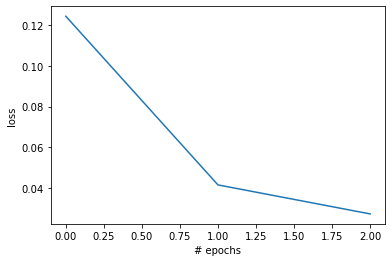

In [46]:
plt.plot(model.history.history['loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

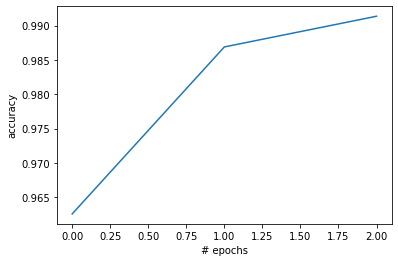

In [47]:
plt.plot(model.history.history['accuracy'])
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.show()

In [48]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0351 - accuracy: 0.9881


[0.0350632481276989, 0.988099992275238]